# НИР по курсу "Технологии машинного обучения"

# Федюнев Александр ИУ5Ц-82Б

# Введение


В качестве предметной области был выбран набор данных, содержащий данные о заработной плате в области обработки и анализа данных.

Ссылка на набор данных: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

Набор данных содержит 11 столбцов, каждый из которых:

* work_year: год, в котором была выплачена зарплата.
* experience_level: Уровень опыта работы в течение года.
* employment_type: ип занятости для данной должности.
* job_title: Должность, на которой вы работали в течение года.
* salary: Общая выплаченная сумма заработной платы брутто.
* salary_currency: Валюта выплачиваемой заработной платы в соответствии с кодом валюты ISO 4217.
* salaryinusd: Зарплата в долларах.
* employee_residence: основная страна проживания сотрудника в течение рабочего года в соответствии с кодом страны ISO 3166.
* remote_ratio: общий объем работы, выполняемой удаленно.
* company_location: Страна главного офиса работодателя или филиала.
* company_size: среднее число людей, работавших в компании в течение года.

В данной работе будем решать задачи регрессии.

## Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
data = pd.read_csv('ds_salaries.csv')

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Первые и последние 5 строк датасета

In [3]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Размер датасета:

In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = data.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 3755
Всего колонок: 11


Столбцы:

In [5]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Типы данных:

In [6]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Проверка на наличие пропущеных значений:

In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Видим, что в наборе данных отсутствуют пропуски.

## Построение графиков для понимания структуры данных

Построим множество графиков, отображающих структуру данных:

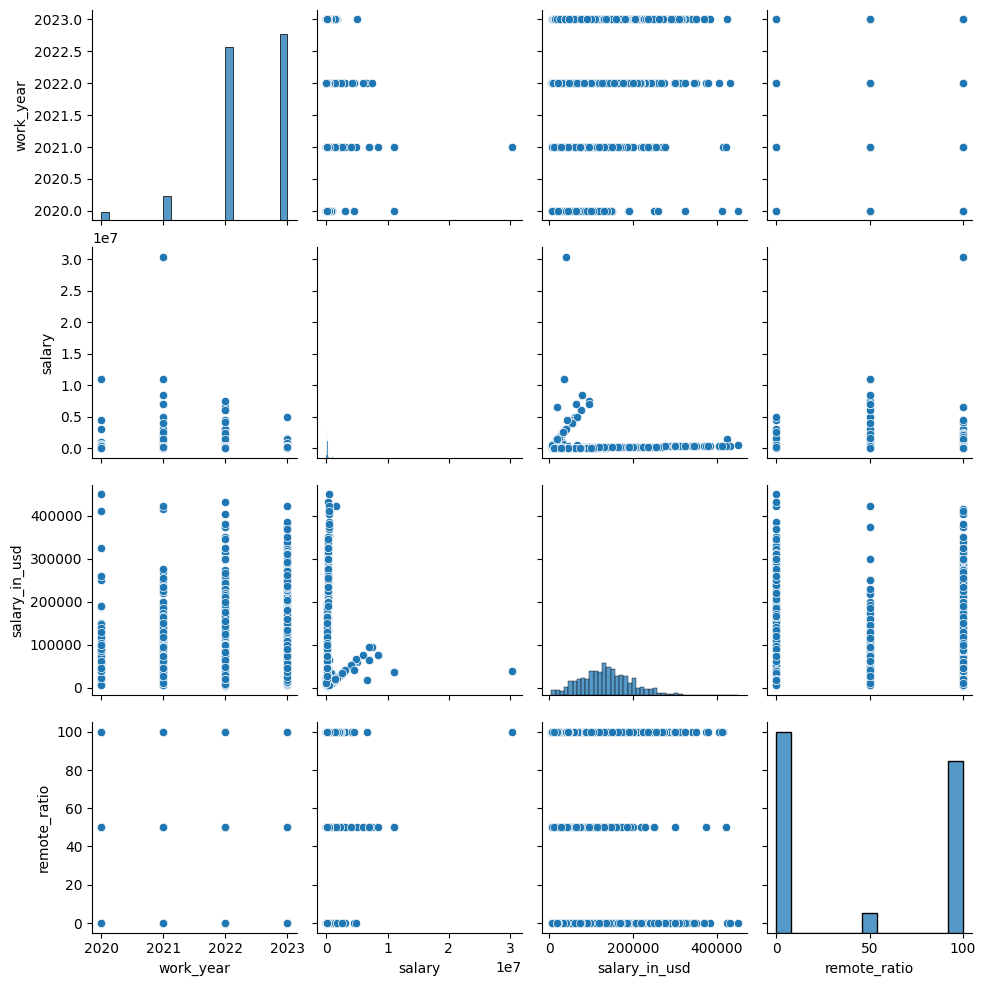

In [8]:
sns.pairplot(data)

Построим графики относительно целевого признака salary.

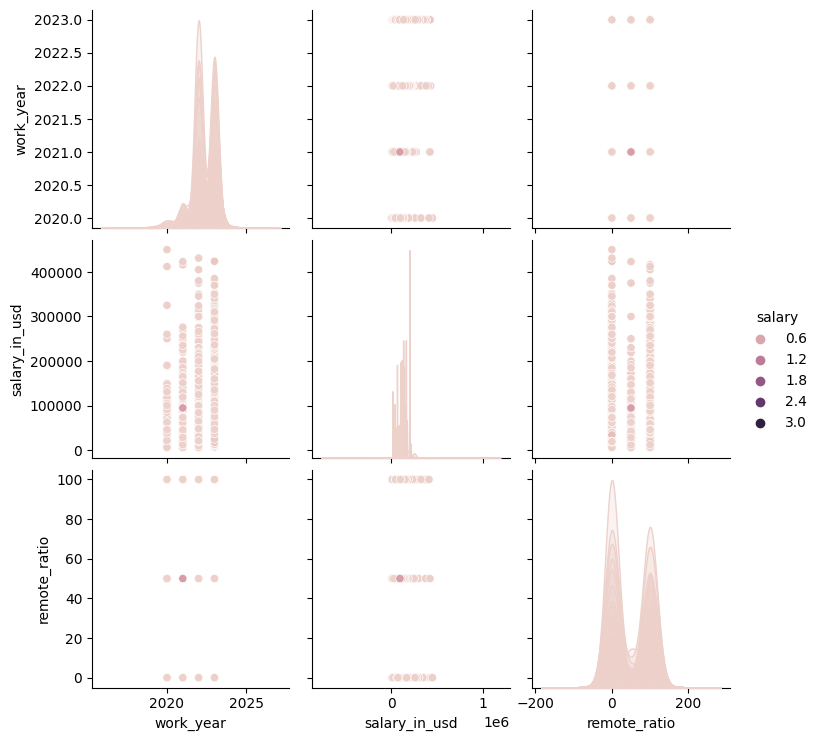

In [10]:
sns.pairplot(data, hue="salary")

## Обработка данных

### Кодирование категориальных признаков и масштабирование данных

Определим типы данных в наборе:

In [13]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Для коректной работы модели необходимо закодировать категориальнын признаки, к таковым относятся столбцы типа Object.

Используя LabelEncoder из sckit-learn закодируем некоторые столбцы типа Object в числовые значения:

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
letype_experiencelevel = LabelEncoder()
learr_experiencelevel = letype_experiencelevel.fit_transform(data["experience_level"])
data["experience_level"] = learr_experiencelevel
data = data.astype({"experience_level":"int64"})

In [16]:
letype_employmenttype = LabelEncoder()
learr_employmenttype = letype_employmenttype.fit_transform(data["employment_type"])
data["employment_type"] = learr_employmenttype
data = data.astype({"employment_type":"int64"})

In [17]:
letype_jobtitle = LabelEncoder()
learr_jobtitle = letype_jobtitle.fit_transform(data["job_title"])
data["job_title"] = learr_jobtitle
data = data.astype({"job_title":"int64"})

In [18]:
letype_salarycurrency = LabelEncoder()
learr_salarycurrency = letype_salarycurrency.fit_transform(data["salary_currency"])
data["salary_currency"] = learr_salarycurrency
data = data.astype({"salary_currency":"int64"})

In [19]:
letype_employeeresidence = LabelEncoder()
learr_employeeresidence = letype_employeeresidence.fit_transform(data["employee_residence"])
data["employee_residence"] = learr_employeeresidence
data = data.astype({"employee_residence":"int64"})

In [20]:
letype_companylocation = LabelEncoder()
learr_companylocation = letype_companylocation.fit_transform(data["company_location"])
data["company_location"] = learr_companylocation
data = data.astype({"company_location":"int64"})

In [21]:
letype_companysize = LabelEncoder()
learr_companysize = letype_companylocation.fit_transform(data["company_size"])
data["company_size"] = learr_companysize
data = data.astype({"company_size":"int64"})

In [22]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


### Масштабирование данных

Проведем масштабирование данных MinMax с помощью средств из sckit-learn:

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data[data.columns])

Сохраним масштабированные данные:

In [25]:
data_scaled = pd.DataFrame()

In [26]:
for i in range(len(data.columns)):
    col = data.columns[i]
    new_col_name = col + '_scaled'
    data_scaled[new_col_name] = scaler_data[:,i]

In [27]:
data_scaled.head()

,work_year_scaled,experience_level_scaled,employment_type_scaled,job_title_scaled,salary_scaled,salary_currency_scaled,salary_in_usd_scaled,employee_residence_scaled,remote_ratio_scaled,company_location_scaled,company_size_scaled
0,1.0,1.000000,0.666667,0.913043,0.002435,0.368421,0.181436,0.337662,1.0,0.352113,0.0
1,1.0,0.666667,0.000000,0.717391,0.000790,1.000000,0.055900,0.974026,1.0,0.985915,1.0
2,1.0,0.666667,0.000000,0.717391,0.000642,1.000000,0.045784,0.974026,1.0,0.985915,1.0
3,1.0,1.000000,0.666667,0.510870,0.005560,1.000000,0.381839,0.142857,1.0,0.169014,0.5
4,1.0,1.000000,0.666667,0.510870,0.003751,1.000000,0.258207,0.142857,1.0,0.169014,0.5


Проверим не повлияло ли масштабирование данных на распределение данных:

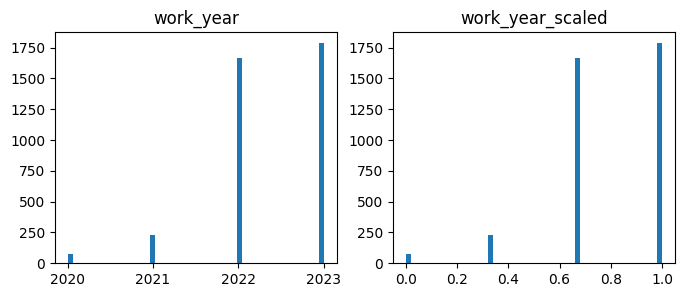

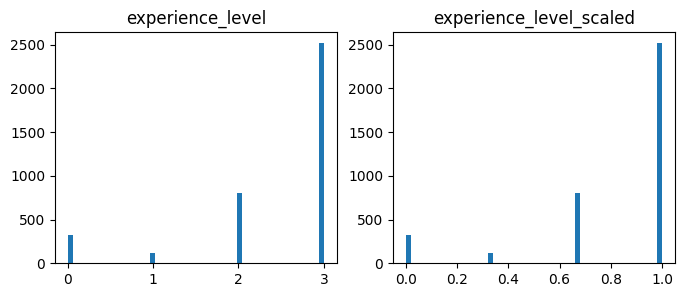

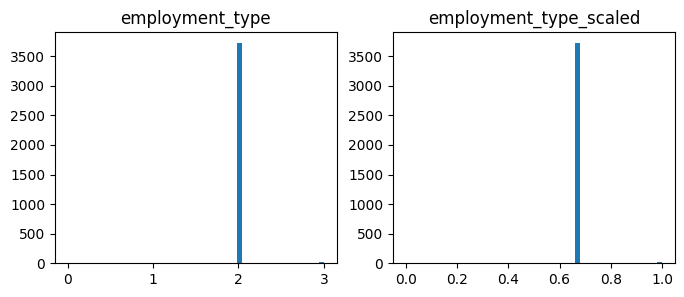

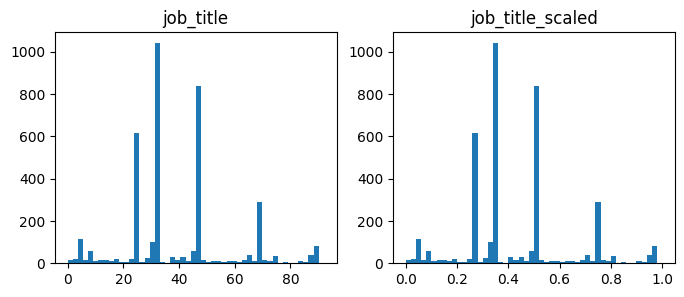

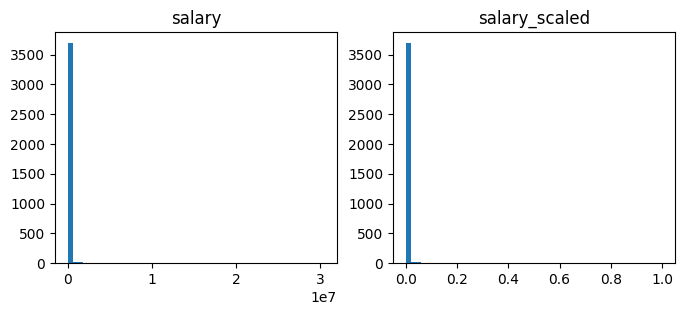

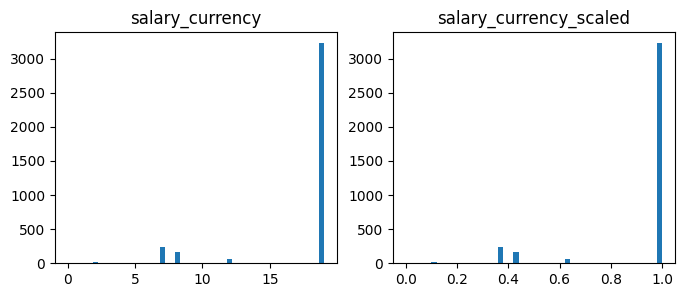

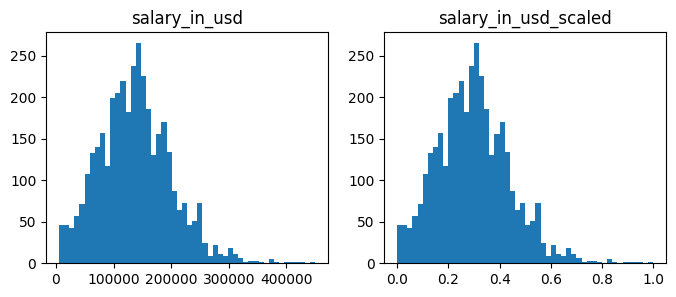

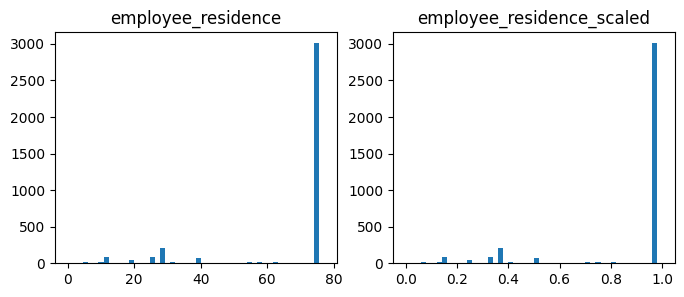

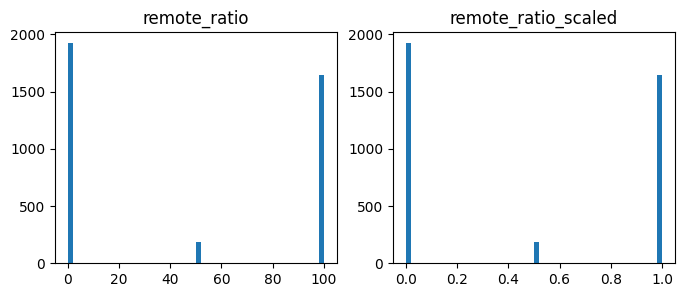

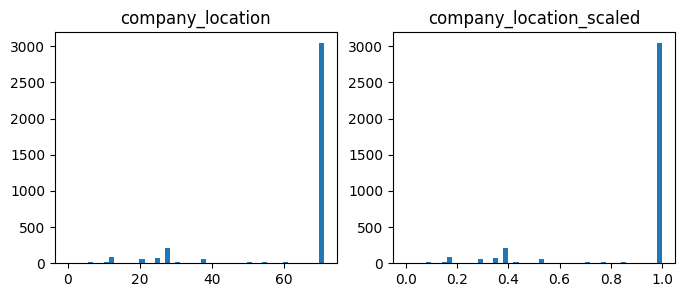

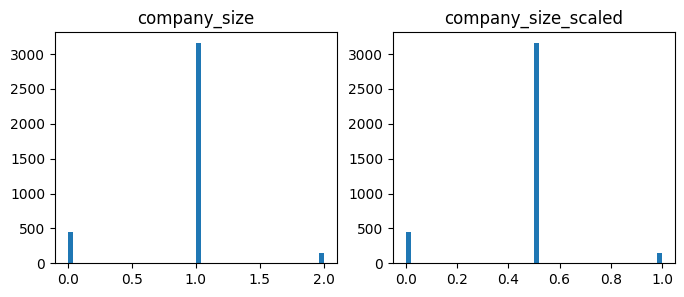

In [28]:
for col in data.columns:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data_scaled[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Масштабирование данных не повлияло на распределение данных.

## Корреляционный анализ данных

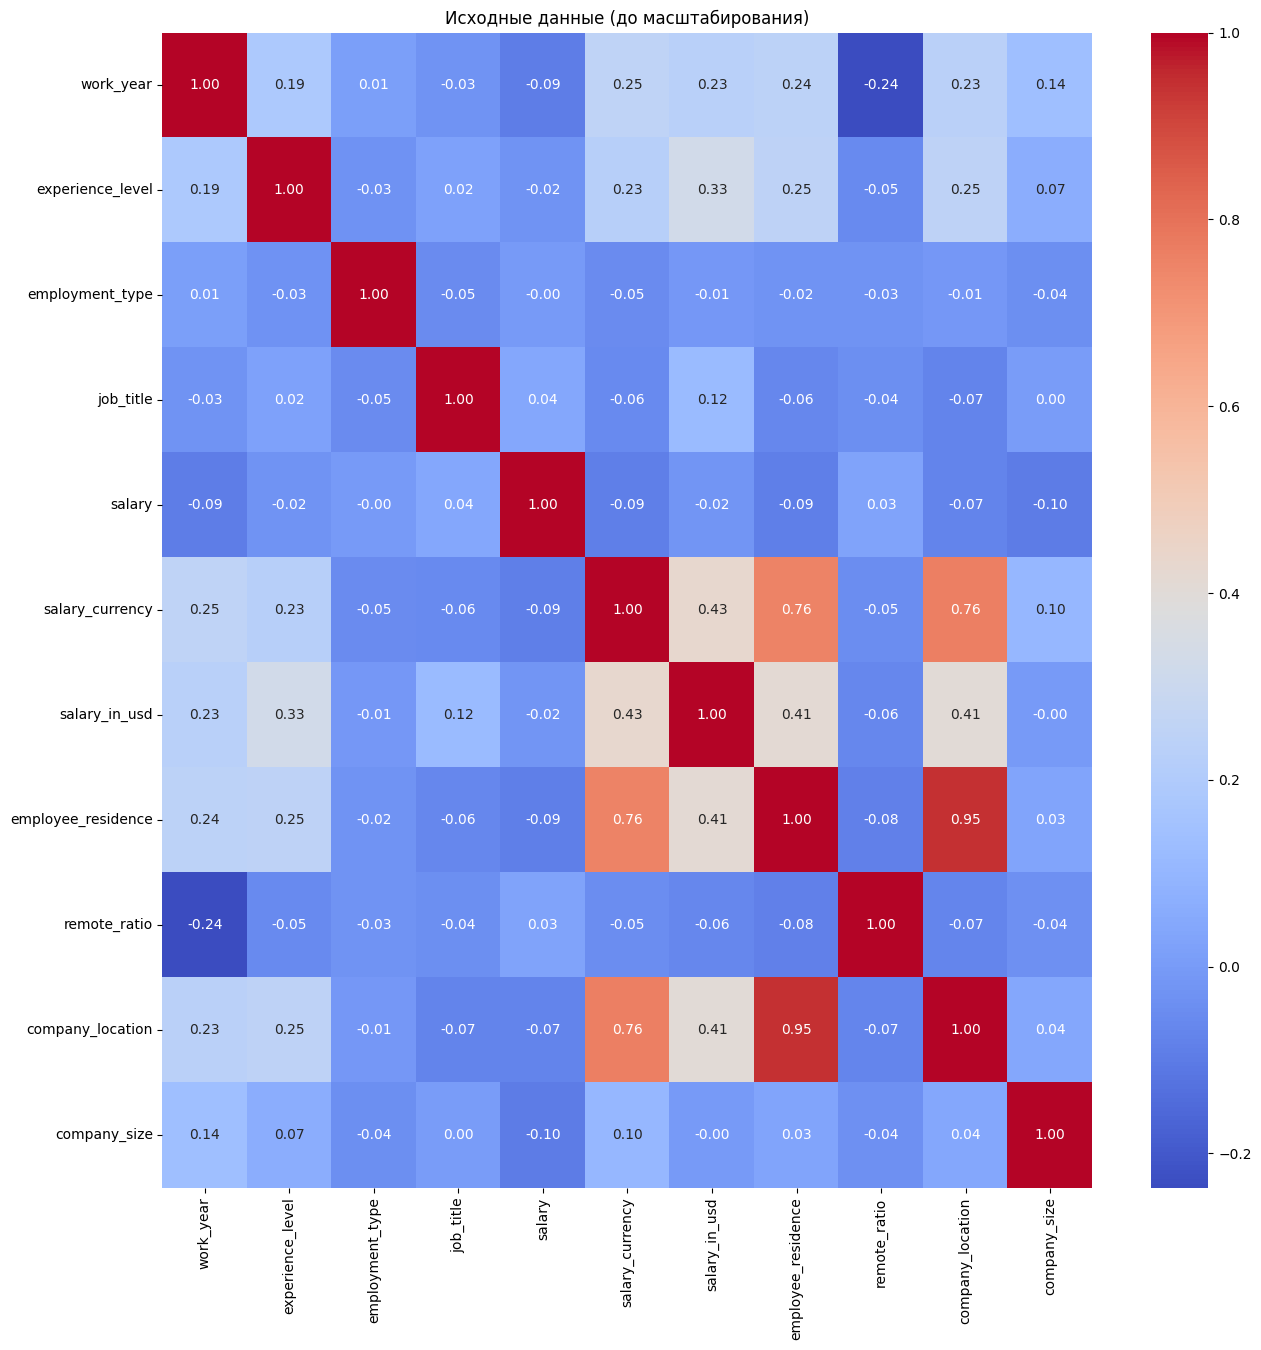

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data[data.columns].corr(), annot=True, fmt='.2f', cmap="coolwarm")
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

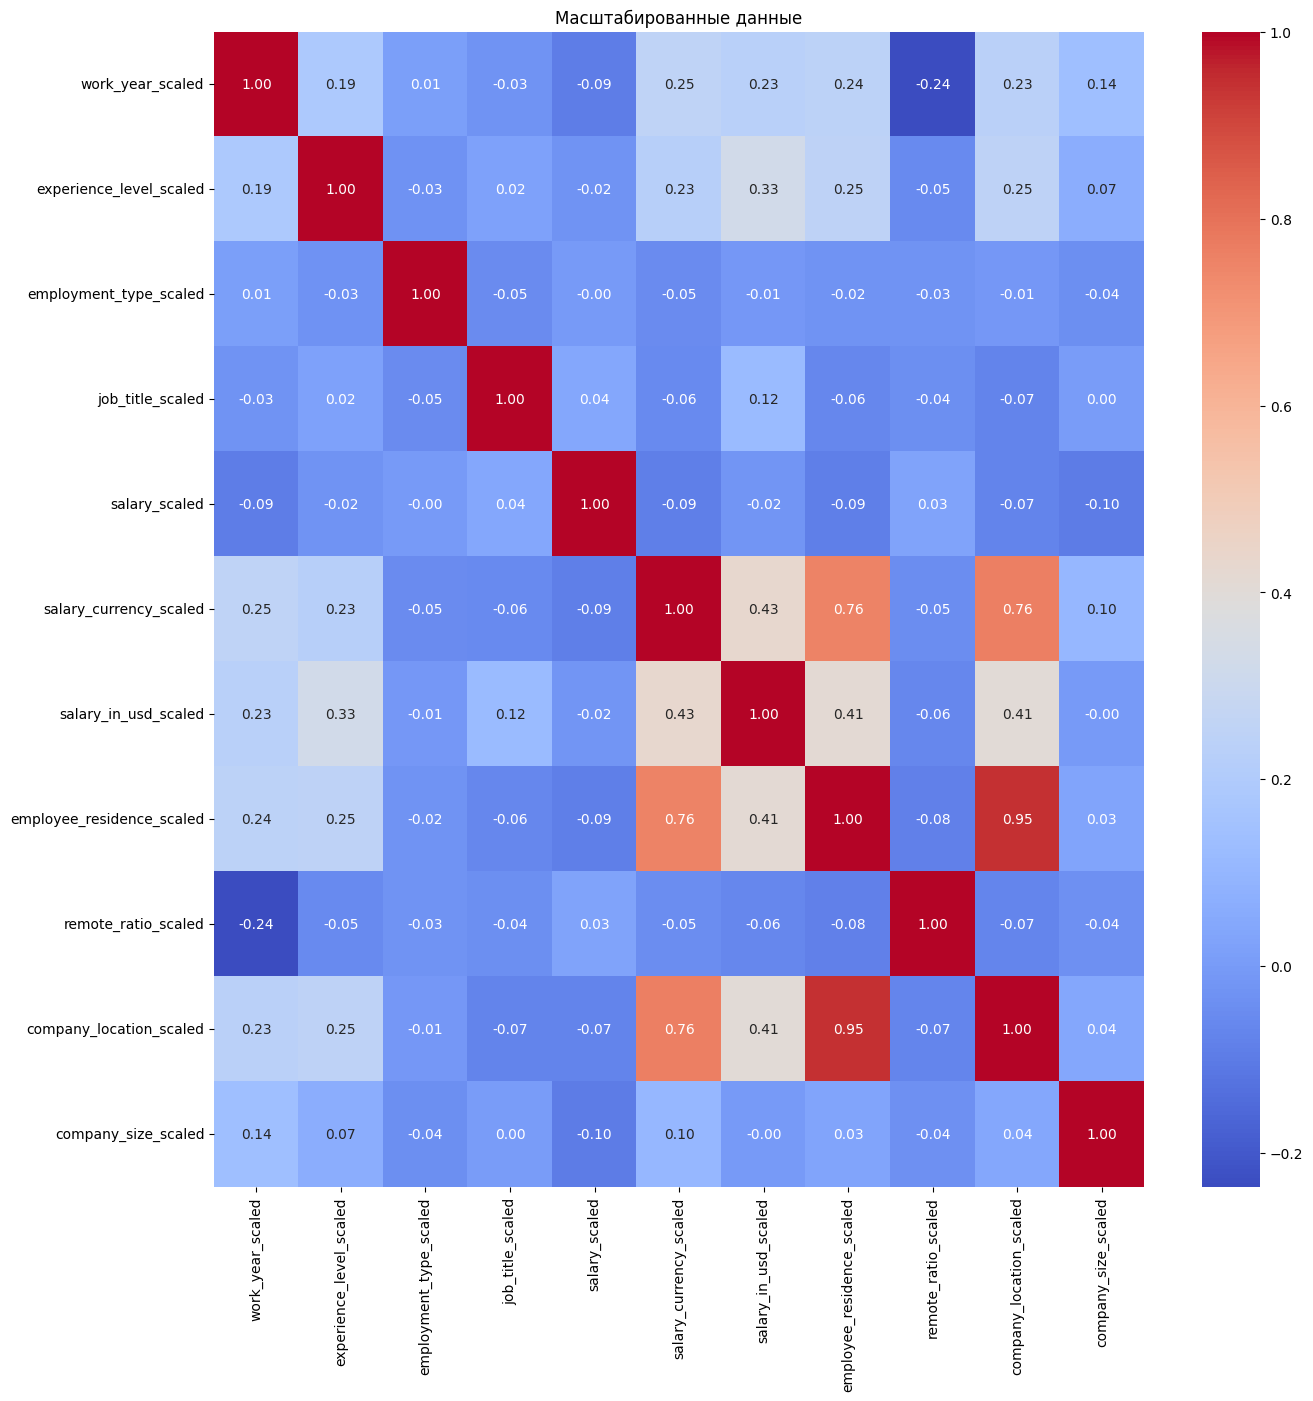

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_scaled[data_scaled.columns].corr(), annot=True, fmt='.2f', cmap="coolwarm")
ax.set_title('Масштабированные данные')
plt.show()

- Корреляционные матрицы для исходных и масштабированных данных идентичны
- Целевой признак регрессии "company_location" наиболее сильно коррелирует с "experience_level" (0.25), "salaray_currency" (0.76), "salaray_in_USD" (0.41) и "employee_residence" (0.95). Эти признаки в модели регрессии оставляем
- Данные позволяют построить модель машинного обучения

## Выбор подходящих моделей для решения задачи регрессии и выбор метрик для оценки качества моделей

Для решения задачи регрессии будем использовать следующие модели:
    
- Линейная  - LR
- Модель ближайших соседей - KNN_20
- Модель опорных векторов - SVR
- Дерево решений - Tree
- Случайный лес - RF
- Градиентный бустинг - GB    

В качестве метрик для решения задачи регрессии будем использовать метрики:

- Mean absolute error (средняя абсолютная ошибка)
- Mean squared error (средняя квадратичная ошибка)
- R2-score (коэффициент детерминации)

Они помогут определить качество моделей.
Метрики будем сохранять в класс:

In [37]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Формирование обучающей и тестовой выборок

Разделим выборку:

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, data.salary, random_state=1)

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2816, 11), (2816,), (939, 11), (939,))

## Построение базового решения (baseline) без подбора гиперпараметров

Построим базовые модели:

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
regr_models = {'LR': LinearRegression(), 
               'KNN_20':KNeighborsRegressor(n_neighbors=20),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

Сохраним метрики:

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
regrMetricLogger = MetricLogger()

In [46]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

Отобразим метрики:

In [48]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.0, MSE=0.0, R2=1.0
KNN_20 	 MAE=36958.703, MSE=724982512830.268, R2=0.363
SVR 	 MAE=114528.417, MSE=1143344450886.573, R2=-0.004
Tree 	 MAE=27496.619, MSE=517770684047.155, R2=0.545
RF 	 MAE=26749.766, MSE=516343964449.699, R2=0.547
GB 	 MAE=25940.631, MSE=480138532113.118, R2=0.578


Чем ближе значение MAE и MSE к 0 и R2 к 1 - тем лучше качество регрессии.

Исходя из метрик моделей, можно сделать следующие выводы:

- Линейная регрессия (LR) показывает отличные результаты на данном датасете, так как MAE и MSE равны нулю, а коэффициент детерминации R2 равен 1.0.

- Модель ближайших соседей (KNN_20) имеет MAE = 36958.703, MSE = 724982512830.268 и R2 = 0.363. Значение R2 говорит о том, что модель объясняет только 36.3% изменчивости данных, что может быть улучшено.

- Метод опорных векторов (SVR) имеет очень плохие результаты: MAE = 114528.417, MSE = 1143344450886.573 и R2 = -0.004. Отрицательное значение R2 говорит о том, что модель работает хуже, чем простая константная модель.

- Дерево решений (Tree) имеет MAE = 27496.619, MSE = 517770684047.155 и R2 = 0.545. Эта модель дала неплохой результат, но значение R2 все же меньше, чем у линейной регрессии.

- Случайный лес (RF) выдает MAE = 26749.766, MSE = 516343964449.699 и R2 = 0.547. Эта модель дает более точные предсказания, чем KNN_20 и Tree, но все же не такие, как у линейной регрессии.

- Градиентный бустинг (GB) имеет лучший результат на этом датасете: MAE = 25940.631, MSE = 480138532113.118 и R2 = 0.578. Значение R2 говорит о том, что модель хорошо объясняет изменчивость данных, но все еще ниже, чем у линейной регрессии.


## Подбор оптимальной модели и гиперпараметра

Подберем оптимальные гиперпараметры: 

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
n_range = np.array(range(5,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [52]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_absolute_error')
regr_gs.fit(X_train, y_train)

CPU times: total: 2.17 s
Wall time: 2.18 s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             scoring='neg_mean_absolute_error')

Лучшая модель:

In [53]:
regr_gs.best_estimator_

KNeighborsRegressor()

Лучшее значение параметров:

In [54]:
regr_gs.best_params_

{'n_neighbors': 5}

Сохраним значение:

In [55]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'5'

Изменение качества:

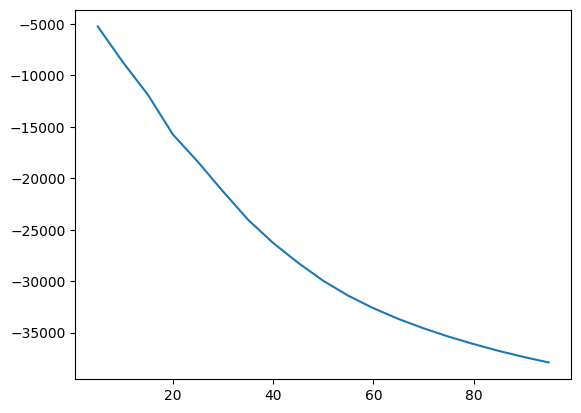

In [56]:
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

## Оптимальное значение гиперпараметра. Сравнение качества с baseline

Оптимальная модель - KNeighborsRegressor. Оптимальное значение гиперпараметра - 5.

Сравним метрики с baseline моделью:

In [57]:
regr_models_grid = {'KNN_20':KNeighborsRegressor(n_neighbors=20), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [58]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_20 	 MAE=36958.703, MSE=724982512830.268, R2=0.363
KNN_5 	 MAE=27900.56, MSE=533339689299.88, R2=0.532


Исходя из предоставленной информации, можно сделать вывод, что модель KNN_5 показывает лучшие результаты, чем модель KNN_20. Это свидетельствует о том, что при использовании модели KNN_5 прогнозирование целевой переменной будет более точным, чем при использовании модели KNN_20.

## Формирование выводов о качестве построенных моделей

Сравним все метрики.

In [60]:
regr_metrics = regrMetricLogger.df['metric'].unique()

Метрика Mean Absolute Error:

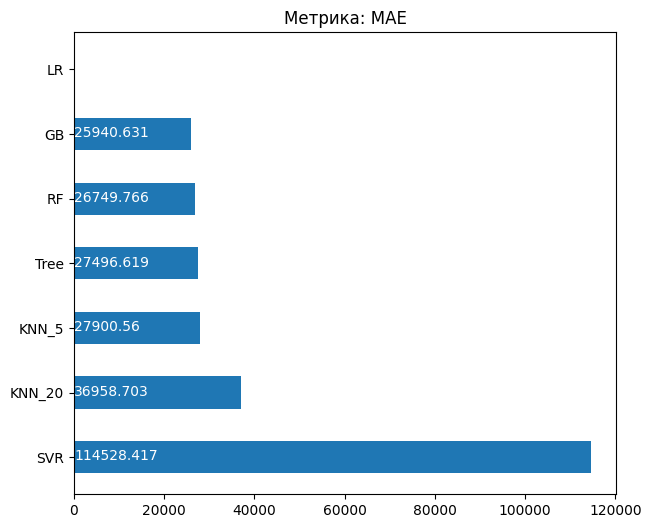

In [61]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

In [62]:
regrMetricLogger_no_svr = MetricLogger()
regr_models_no_svr = {'LR': LinearRegression(), 
               'KNN_20':KNeighborsRegressor(n_neighbors=20),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [63]:
for model_name, model in regr_models_no_svr.items():
    regr_train_model(model_name, model, regrMetricLogger_no_svr)

LR 	 MAE=0.0, MSE=0.0, R2=1.0
KNN_20 	 MAE=36958.703, MSE=724982512830.268, R2=0.363
Tree 	 MAE=27198.941, MSE=517538099352.611, R2=0.546
RF 	 MAE=26259.103, MSE=509270704776.211, R2=0.553
GB 	 MAE=24772.824, MSE=453977959865.037, R2=0.601


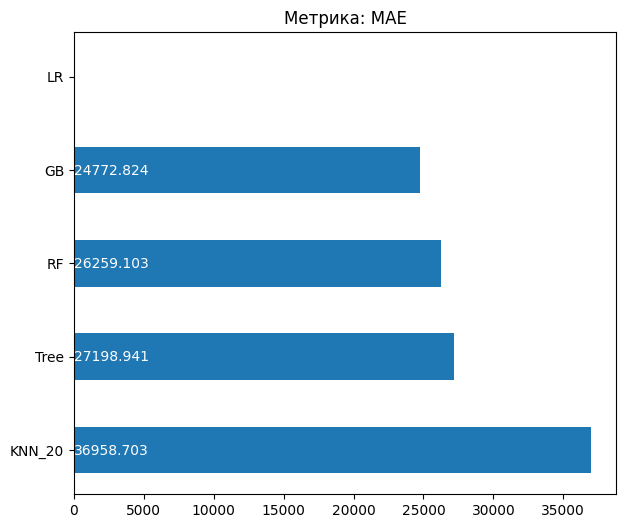

In [64]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

Чем ближе значение метрики к 0, тем качественне модель. Лучший результат показывает модель линейной регрессии, худший - модель опорных векторов.

Метрика Mean Squarred Error:

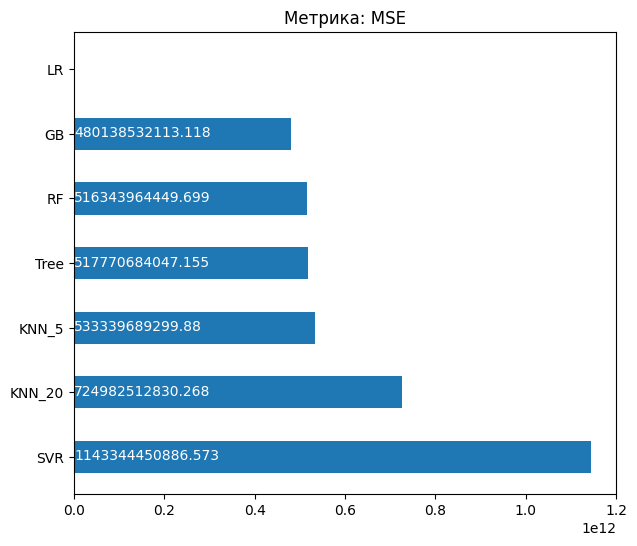

In [65]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

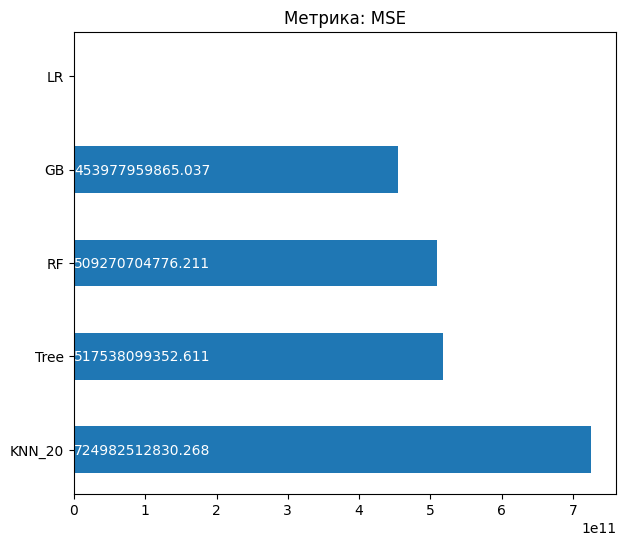

In [66]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

Чем ближе значение метрики к нулю, тем модель более качественна. Модель линейной регрессии выигрывает по качеству у остальных. Модель SVR обладает наихудшем качеством.

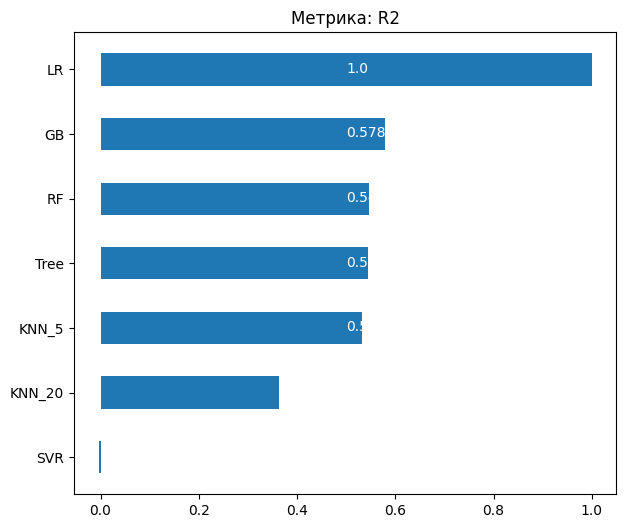

In [67]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

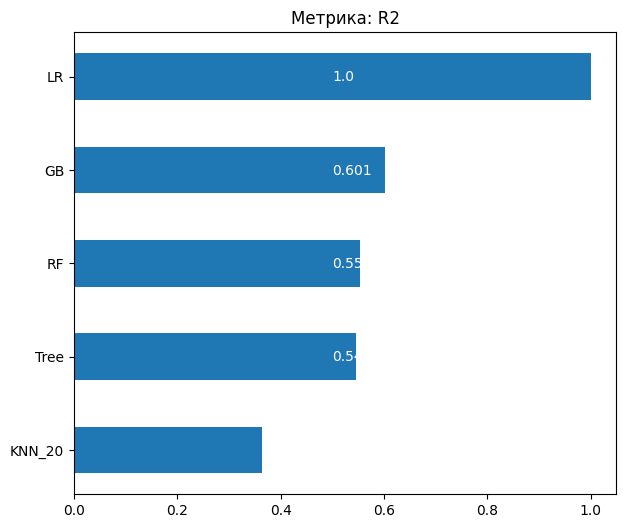

In [68]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

Исходя из метрики R2-score - наихудший результат показывает модель опорных векторов. Лучшими моделями можно считать модели линейной регрессии, градиентного бустинга, случайного леса и дерева решений.

Подводя итог: наиболее качественной моделью можно считать модель линейной регрессии.